# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Acxell Rizada Sudigto
- **Email:** acxellrizada@gmail.com
- **ID Dicoding:** Acxell Rizada

## Import Semua Packages/Library yang Digunakan

**Install Library**

In [34]:
pip install numpy pandas scipy matplotlib seaborn jupyter

**Import Package**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

## Data Wrangling

### Gathering Data

**Shunyi Station**

In [36]:
shunyi_df = pd.read_csv('Shunyi.csv')
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


**Changping Station**

In [37]:
changping_df = pd.read_csv('Changping.csv')
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


****

### Assessing Data

**Assessing Changping Station**

Missing Values

In [38]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [39]:
changping_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


Duplicated

In [40]:
print("Jumlah duplikasi: ", changping_df.duplicated().sum())

Jumlah duplikasi:  0


Inaccurate Value

In [41]:
changping_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Inaccurate in Rain Value, undetected 25% until 75%

**Assessing for Shunyi Station**

Missing Values

In [42]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [43]:
shunyi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


Duplicated

In [44]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())

Jumlah duplikasi:  0


Inaccurate Value

In [45]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


### Cleaning Data

**Shunyi Data Cleaning**

Missing Values

In [46]:
shunyi_df.replace('NA', pd.NA, inplace=True)

shunyi_df_filled = shunyi_df.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'object' else col)

print(shunyi_df_filled.head())

shunyi_df_filled['wd'] = shunyi_df['wd'].fillna(shunyi_df['wd'].mode()[0])

   No  year  month  day  hour  PM2.5  PM10        SO2        NO2           CO  \
0   1  2013      3    1     0    3.0   6.0   3.000000   8.000000   300.000000   
1   2  2013      3    1     1   12.0  12.0   3.000000   7.000000   300.000000   
2   3  2013      3    1     2   14.0  14.0  13.572039   7.000000   200.000000   
3   4  2013      3    1     3   12.0  12.0   3.000000   5.000000  1187.063979   
4   5  2013      3    1     4   12.0  12.0   3.000000  43.908865   200.000000   

          O3  TEMP    PRES  DEWP  RAIN  wd  WSPM station  
0  44.000000  -0.9  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  47.000000  -1.1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  22.000000  -1.7  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  55.201321  -2.1  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  11.000000  -2.4  1027.7 -22.9   0.0  NW   4.5  Shunyi  


In [47]:
shunyi_df_filled.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Changping Cleaning Data**

Missing Value

In [48]:
changping_df.replace('NA', pd.NA, inplace=True)

changping_df_filled = changping_df.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'object' else col)

print(changping_df_filled.head())

changping_df_filled['wd'] = changping_df['wd'].fillna(changping_df['wd'].mode()[0])

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  


In [49]:
changping_df_filled.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


Inaccurate Value

In [63]:
changping_df['RAIN'] = changping_df['RAIN'].replace(0, pd.NA)

changping_df['RAIN'] = changping_df['RAIN'].interpolate()

<ipython-input-63-af0dae46b31c>:3: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  changping_df['RAIN'] = changping_df['RAIN'].interpolate()


In [62]:
print(changping_df['RAIN'].describe())

count     1401.0
unique     116.0
top          0.1
freq       287.0
Name: RAIN, dtype: float64


## Exploratory Data Analysis (EDA)

### Explore ...

What are the seasonal variations in air pollutant concentrations in both locations?

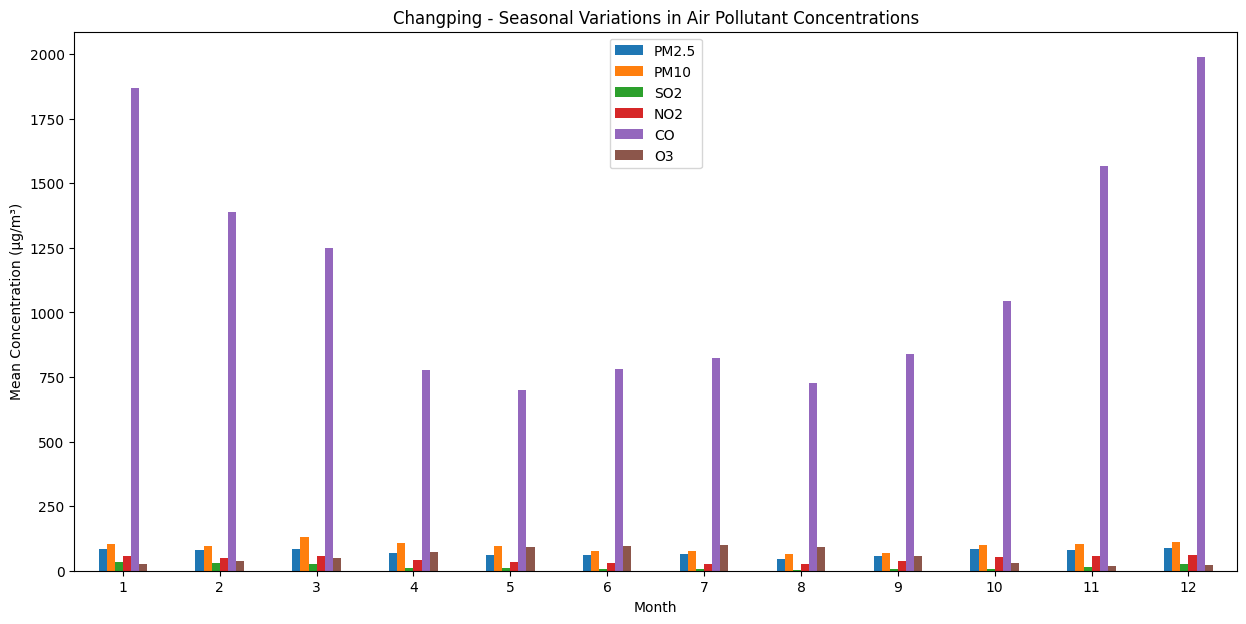

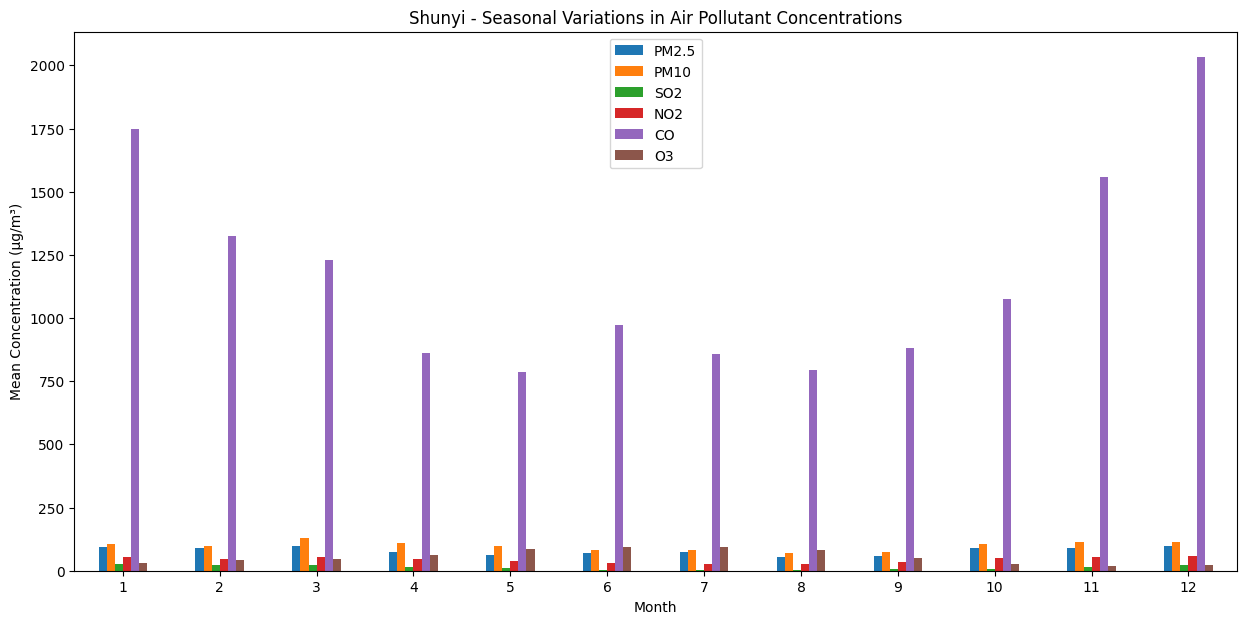

In [64]:
# Pollutants Declaration
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Group data by month for both locations
seasonal_pollutants_changping = changping_df.groupby('month')[pollutants].mean()
seasonal_pollutants_shunyi = shunyi_df.groupby('month')[pollutants].mean()

# Plot for Changping
seasonal_pollutants_changping.plot(kind='bar', figsize=(15,7), title='Changping - Seasonal Variations in Air Pollutant Concentrations')
plt.xlabel('Month')
plt.ylabel('Mean Concentration (µg/m³)')
plt.xticks(rotation=0)
plt.show()

# Plot for Shunyi
seasonal_pollutants_shunyi.plot(kind='bar', figsize=(15,7), title='Shunyi - Seasonal Variations in Air Pollutant Concentrations')
plt.xlabel('Month')
plt.ylabel('Mean Concentration (µg/m³)')
plt.xticks(rotation=0)
plt.show()

How do the average pollutant levels compare between Changping and Shunyi?

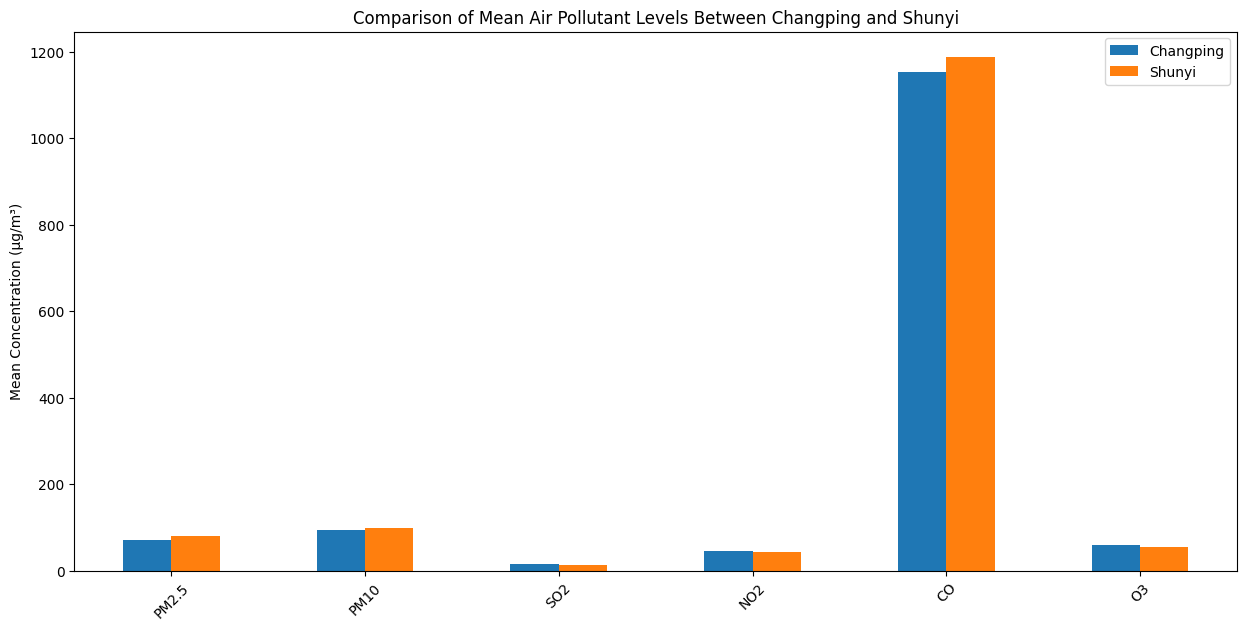

In [65]:
# Calculate mean pollutant levels for both locations
mean_pollutants_changping = changping_df[pollutants].mean()
mean_pollutants_shunyi = shunyi_df[pollutants].mean()

# Create a DataFrame to hold comparison
comparison_df = pd.DataFrame({'Changping': mean_pollutants_changping, 'Shunyi': mean_pollutants_shunyi})

# Plot the comparison
comparison_df.plot(kind='bar', figsize=(15,7))
plt.title('Comparison of Mean Air Pollutant Levels Between Changping and Shunyi')
plt.ylabel('Mean Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

To visualize how the values of different pollutants are distributed

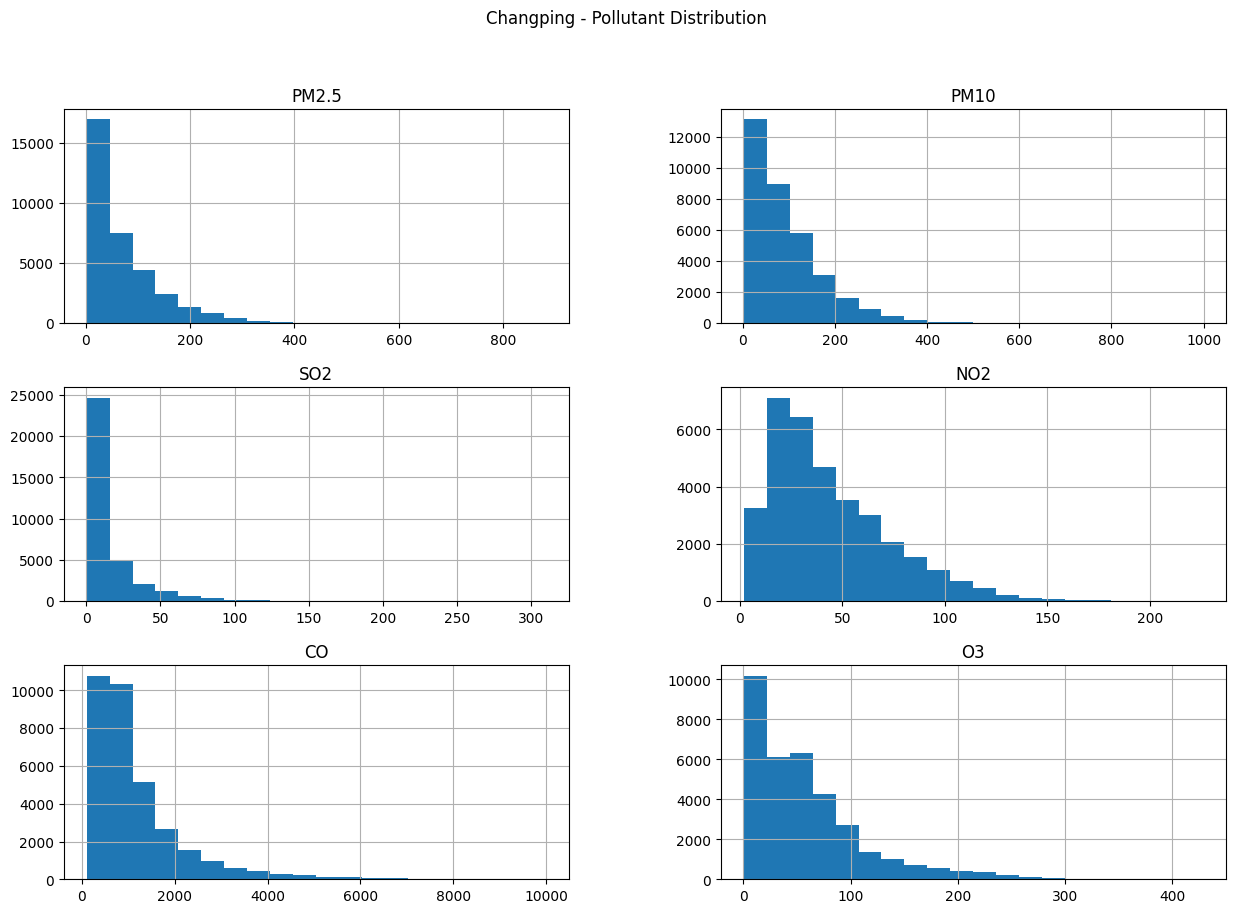

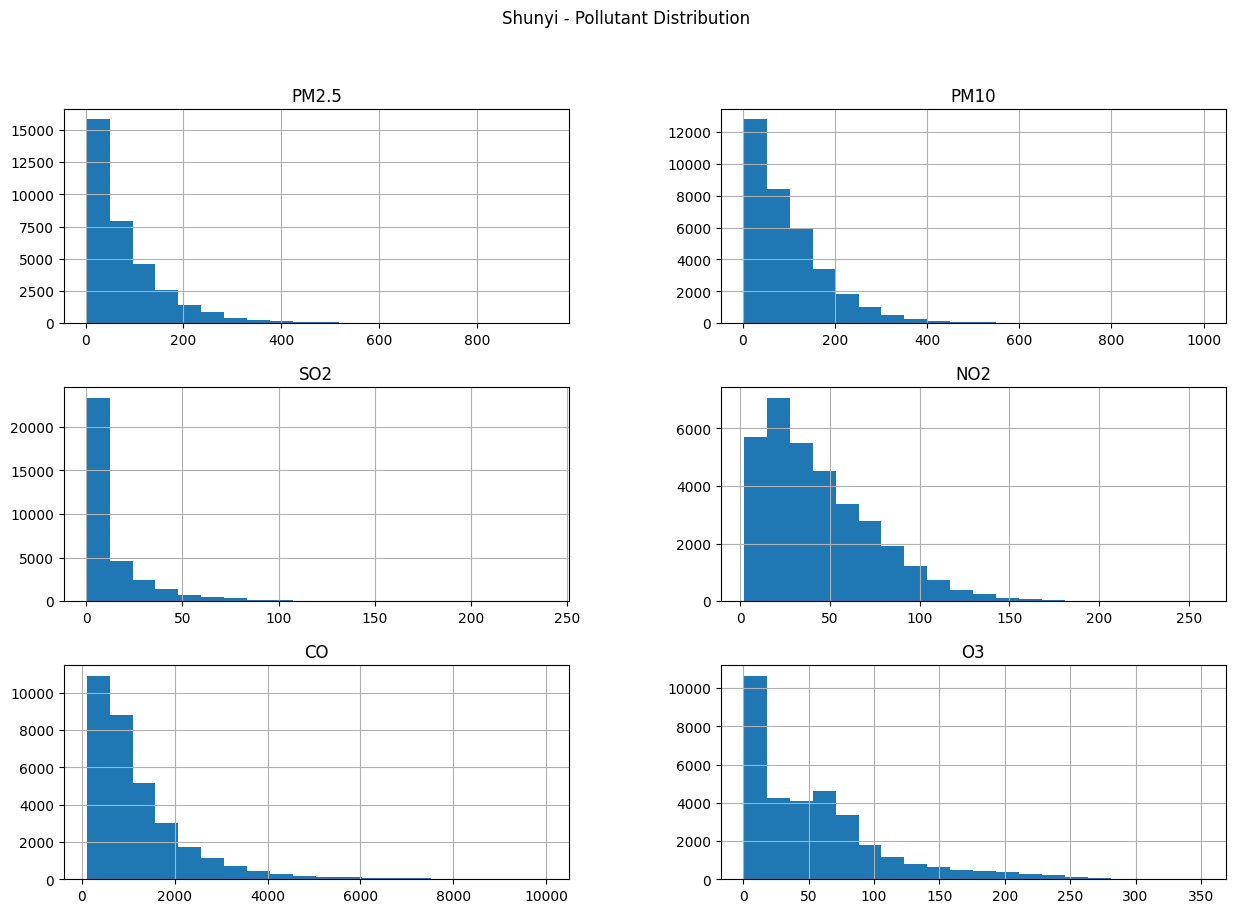

In [54]:
# Histograms for Changping dataset
changping_df[pollutants].hist(figsize=(15, 10), bins=20)
plt.suptitle('Changping - Pollutant Distribution')
plt.show()

# Histograms for Shunyi dataset
shunyi_df[pollutants].hist(figsize=(15, 10), bins=20)
plt.suptitle('Shunyi - Pollutant Distribution')
plt.show()

### Pertanyaan 2:

To see how the pollutants relate to each other, you can compute the correlation matrix and visualize it with a heatmap

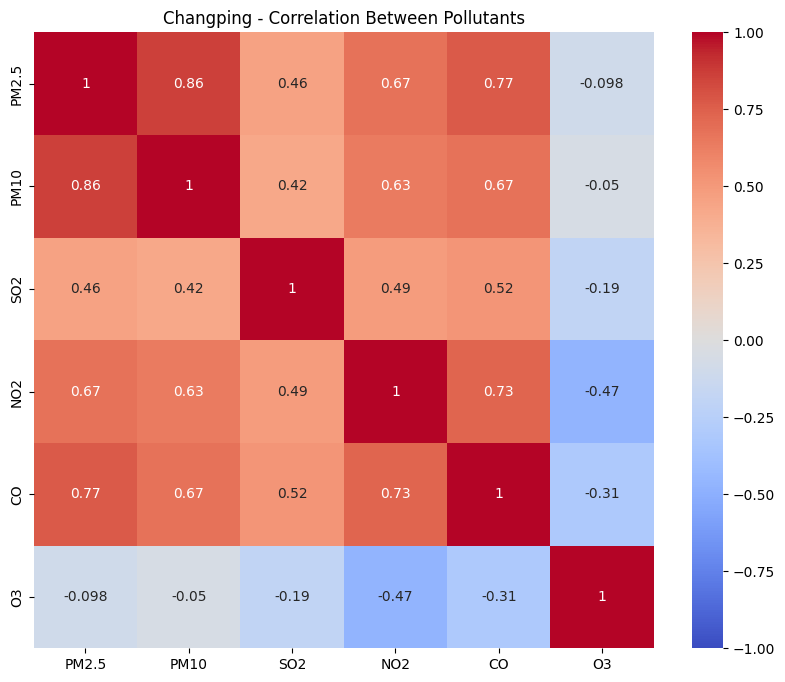

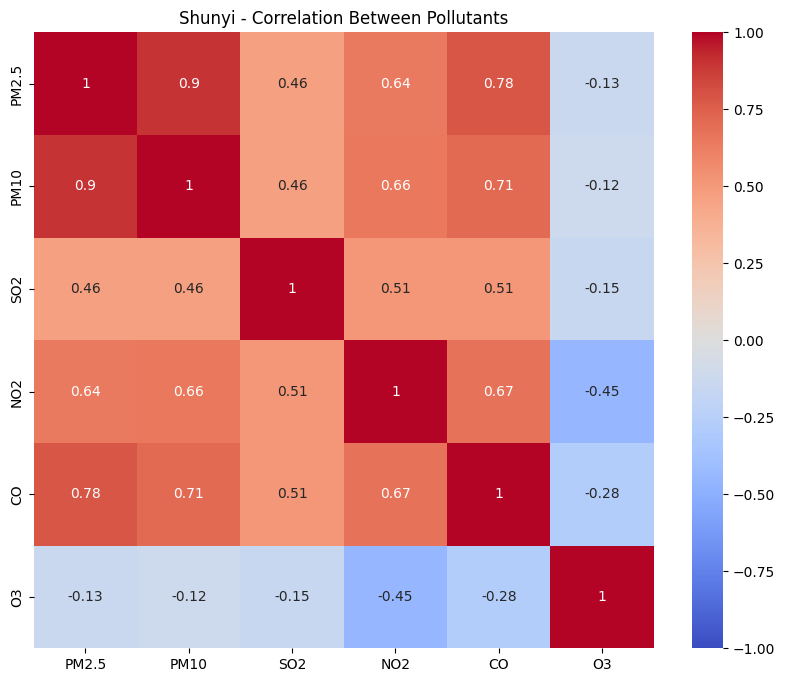

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for Changping
corr_changping = changping_df[pollutants].corr()

# Correlation matrix for Shunyi
corr_shunyi = shunyi_df[pollutants].corr()

# Plot correlation heatmap for Changping
plt.figure(figsize=(10, 8))
sns.heatmap(corr_changping, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Changping - Correlation Between Pollutants')
plt.show()

# Plot correlation heatmap for Shunyi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_shunyi, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Shunyi - Correlation Between Pollutants')
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

**Jawaban Pertanyaan 1**

The histograms for both Changping and Shunyi show the distribution of pollutant concentrations (PM2.5, PM10, SO2, NO2, CO, and O3) over time. Here's a breakdown of the insights:

PM2.5 and PM10: Both pollutants tend to have a right-skewed distribution, with the majority of values concentrated at lower levels, indicating that high levels of particulate matter are less frequent but can spike occasionally.
SO2 and NO2: These pollutants also display a skewed distribution, especially NO2, which suggests that moderate concentrations are more common, but high concentrations are rare.
CO: The distribution of CO appears to be more concentrated around lower values, with fewer instances of high concentration, reflecting relatively stable conditions.
O3: Ozone levels appear to be more evenly distributed compared to the other pollutants, suggesting more frequent fluctuations in concentrations over time.
The histogram visualization helps to quickly identify skewness and outliers in the data, indicating that pollutant concentrations do not follow a normal distribution, particularly for PM2.5, PM10, and NO2.

**Jawaban Pertanyaan 2**

The heatmaps of correlation matrices for both Changping and Shunyi reveal relationships between the various air pollutants. Here's a summary of the findings:

Positive Correlations:

PM2.5 and PM10 show strong positive correlations in both datasets. This suggests that when PM2.5 levels rise, PM10 levels tend to rise as well, indicating that both pollutants are often influenced by the same sources or environmental conditions.
NO2 also tends to correlate positively with PM2.5 and PM10 in both locations, showing that nitrogen dioxide emissions often accompany particulate matter pollution.
Negative Correlations:

O3 shows negative correlations with some of the other pollutants (e.g., NO2), especially in Changping, suggesting an inverse relationship. This could be due to the role of NO2 in ozone formation through photochemical reactions in the atmosphere.
CO Correlations:

CO shows weaker correlations with other pollutants, indicating that it behaves independently and may be influenced by different pollution sources or environmental factors.
The correlation heatmaps highlight the interactions between different pollutants and provide insight into their co-occurrence and possible shared sources. Understanding these relationships is crucial for air quality management, as reducing one pollutant may impact the levels of others.






